# House Price Prediction

## Load the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True) # Remove null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Data Exploration

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(["median_house_value"], axis=1) # Data without the column whose values we want to predict
y = data["median_house_value"] # The column whose values we want to predict

In [11]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Split the data into training and testing datasets

In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data # Training related data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
818,-122.08,37.62,17.0,2485.0,518.0,1139.0,550.0,2.6875,NEAR BAY,157300.0
8680,-118.33,33.88,36.0,1271.0,346.0,811.0,345.0,3.2417,<1H OCEAN,283300.0
2438,-119.62,36.59,17.0,2287.0,390.0,1330.0,393.0,4.0197,INLAND,88000.0
4693,-118.37,34.07,52.0,2203.0,437.0,899.0,384.0,4.2500,<1H OCEAN,486900.0
4581,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
...,...,...,...,...,...,...,...,...,...,...
17695,-121.83,37.29,10.0,1828.0,453.0,1356.0,409.0,4.5943,<1H OCEAN,123500.0
4119,-118.20,34.14,52.0,3800.0,646.0,1842.0,620.0,5.5524,<1H OCEAN,293900.0
16512,-121.22,37.72,34.0,2123.0,387.0,1310.0,368.0,2.6368,INLAND,165600.0
3197,-119.67,36.35,10.0,1090.0,164.0,470.0,158.0,4.9432,INLAND,118800.0


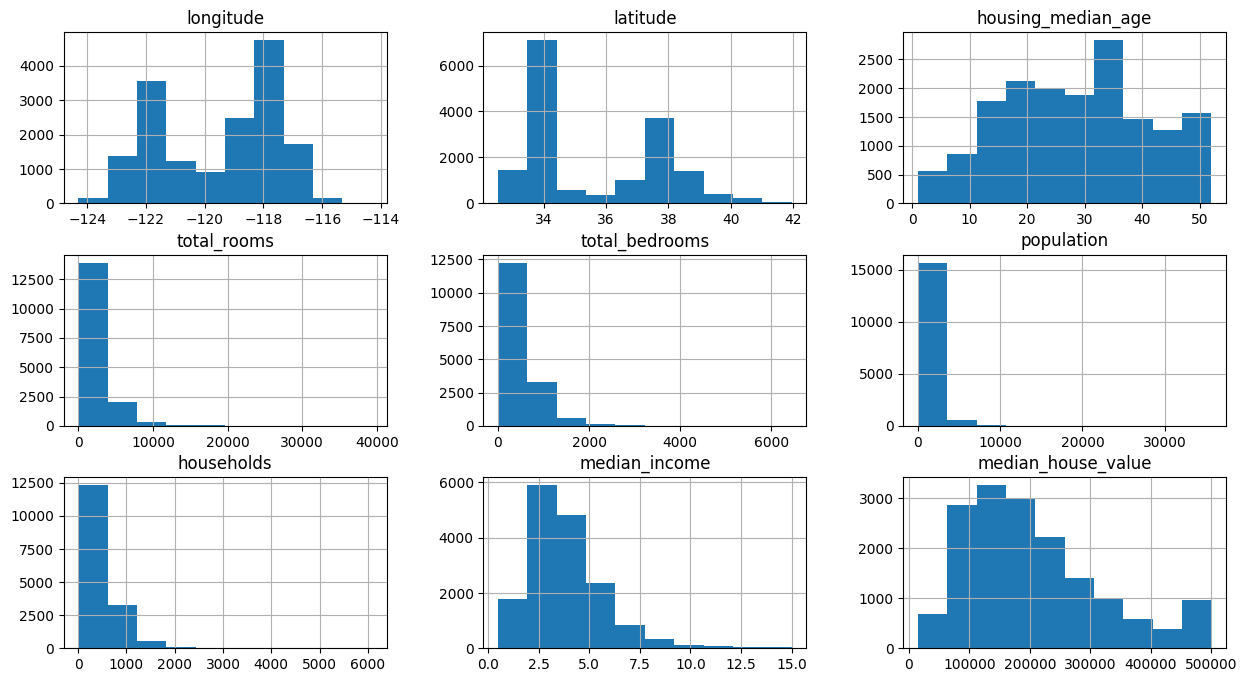

In [16]:
train_data.hist(figsize=(15, 8)); # We notice 4 features look skewed

In [17]:
train_data.drop(["ocean_proximity"], axis=1).corr() # Looking for correlation between the data; dropped a troublesome column, temporarily

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924510,-0.112768,0.045707,0.070769,0.100228,0.057099,-0.015210,-0.044999
latitude,-0.924510,1.000000,0.014182,-0.035895,-0.067680,-0.108599,-0.072103,-0.079007,-0.144504
housing_median_age,-0.112768,0.014182,1.000000,-0.362609,-0.321832,-0.297873,-0.304930,-0.115209,0.109441
total_rooms,0.045707,-0.035895,-0.362609,1.000000,0.929641,0.852657,0.916350,0.193785,0.129244
total_bedrooms,0.070769,-0.067680,-0.321832,0.929641,1.000000,0.874430,0.978894,-0.011453,0.045501
population,0.100228,-0.108599,-0.297873,0.852657,0.874430,1.000000,0.905113,0.001072,-0.029206
households,0.057099,-0.072103,-0.304930,0.916350,0.978894,0.905113,1.000000,0.009089,0.060466
median_income,-0.015210,-0.079007,-0.115209,0.193785,-0.011453,0.001072,0.009089,1.000000,0.688650
median_house_value,-0.044999,-0.144504,0.109441,0.129244,0.045501,-0.029206,0.060466,0.688650,1.000000


<Axes: >

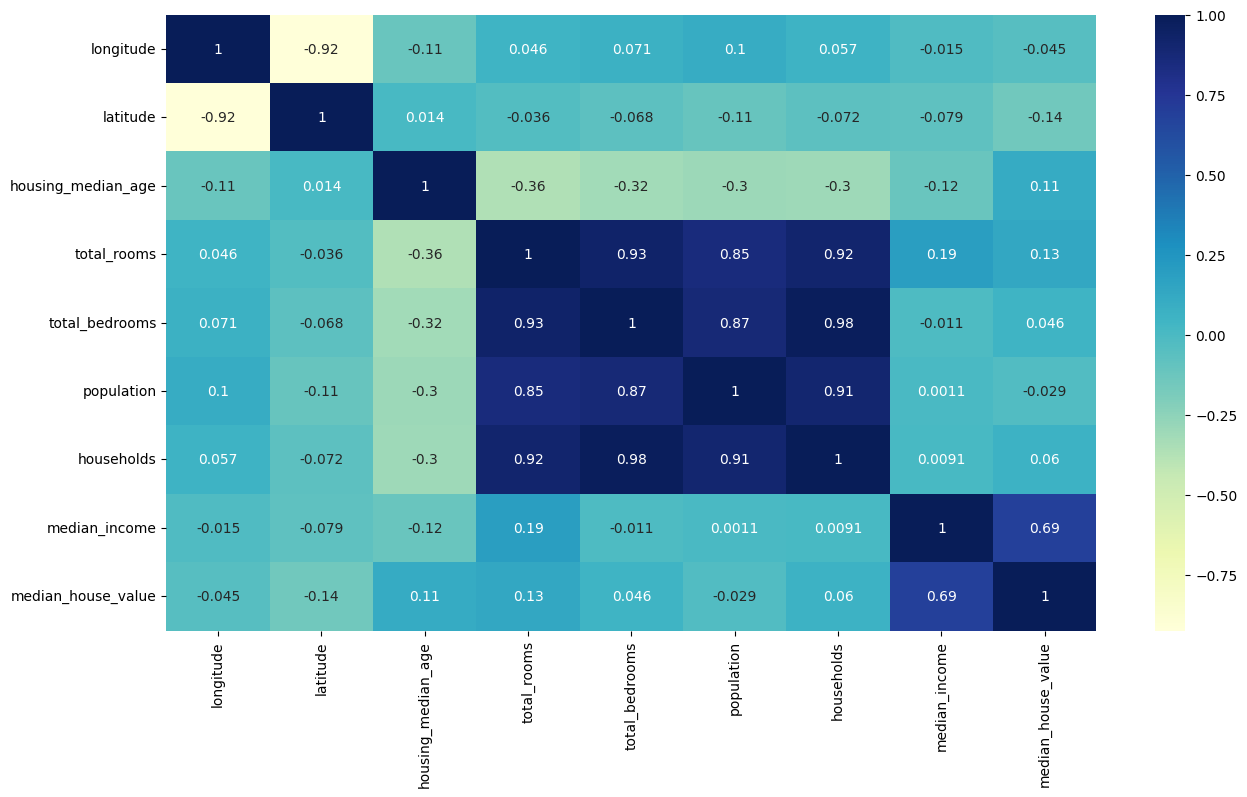

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.drop(["ocean_proximity"], axis=1).corr(), annot=True, cmap="YlGnBu") # Same as before but pretty

## Data Preprocessing

In [19]:
# We take the skewed features and find their logarithm
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["total_rooms"] + 1)

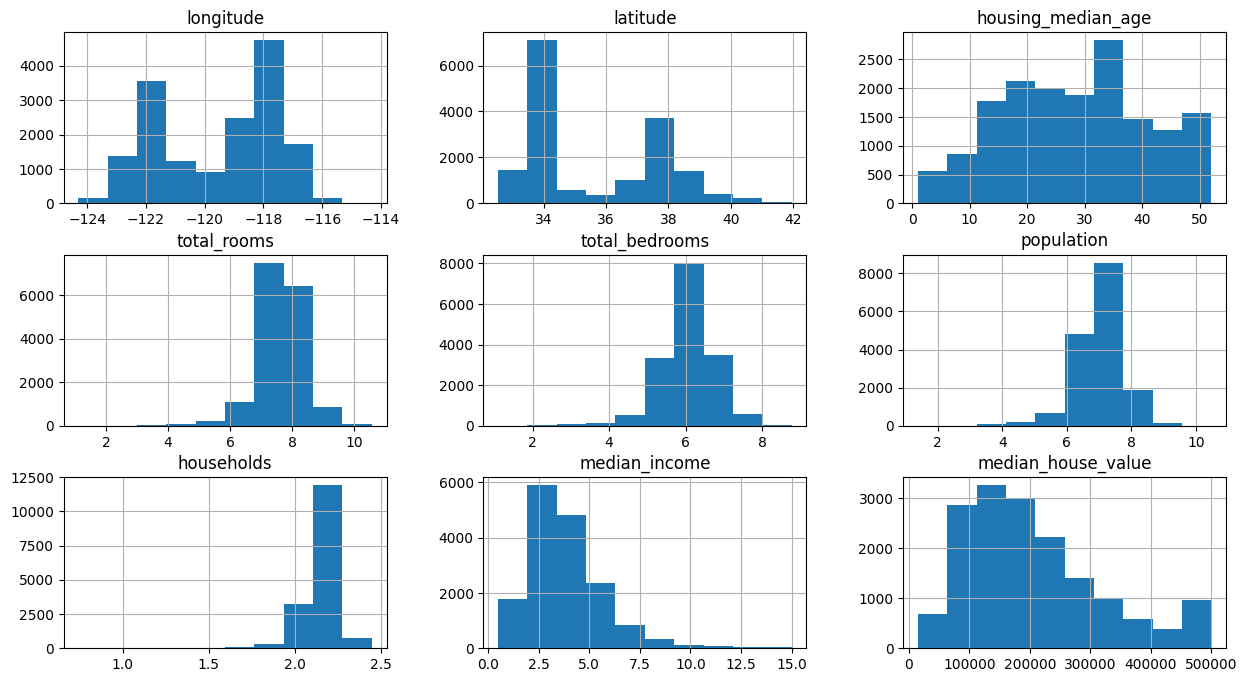

In [21]:
# We notice they now better resemble a Gaussian bell curve
train_data.hist(figsize=(15, 8));

In [22]:
# We now attempt to better represent the ocean_proximity feature
train_data.ocean_proximity.value_counts() # We will turn each value into its own feature

ocean_proximity
<1H OCEAN     7232
INLAND        5168
NEAR OCEAN    2127
NEAR BAY      1815
ISLAND           4
Name: count, dtype: int64

In [23]:
pd.get_dummies(train_data.ocean_proximity) # We have turned each value into its own feature

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
818,False,False,False,True,False
8680,True,False,False,False,False
2438,False,True,False,False,False
4693,True,False,False,False,False
4581,True,False,False,False,False
...,...,...,...,...,...
17695,True,False,False,False,False
4119,True,False,False,False,False
16512,False,True,False,False,False
3197,False,True,False,False,False


In [24]:
train_data.join(pd.get_dummies(train_data.ocean_proximity)) # We append the new features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
818,-122.08,37.62,17.0,7.818430,6.251904,7.038784,2.176844,2.6875,NEAR BAY,157300.0,False,False,False,True,False
8680,-118.33,33.88,36.0,7.148346,5.849325,6.699500,2.097815,3.2417,<1H OCEAN,283300.0,True,False,False,False,False
2438,-119.62,36.59,17.0,7.735433,5.968708,7.193686,2.167388,4.0197,INLAND,88000.0,False,True,False,False,False
4693,-118.37,34.07,52.0,7.698029,6.082219,6.802395,2.163096,4.2500,<1H OCEAN,486900.0,True,False,False,False,False
4581,-118.28,34.06,17.0,7.831617,7.087574,8.023552,2.178338,1.7199,<1H OCEAN,175000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17695,-121.83,37.29,10.0,7.511525,6.118097,7.213032,2.141421,4.5943,<1H OCEAN,123500.0,True,False,False,False,False
4119,-118.20,34.14,52.0,8.243019,6.472346,7.519150,2.223869,5.5524,<1H OCEAN,293900.0,True,False,False,False,False
16512,-121.22,37.72,34.0,7.661056,5.961005,7.178545,2.158837,2.6368,INLAND,165600.0,False,True,False,False,False
3197,-119.67,36.35,10.0,6.994850,5.105945,6.154858,2.078798,4.9432,INLAND,118800.0,False,True,False,False,False


In [26]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1) # ocean_proximity is now obsolete